# Module: Exploring the Matplotlib Data Visualization Package

# Import required modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Introductory examples

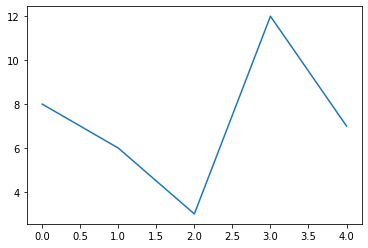

In [11]:
# Generic plot command
plt.plot([8, 6, 3, 12, 7])
plt.show()

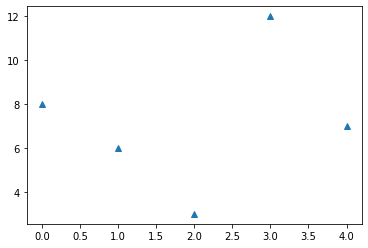

In [6]:
# Change mark type
# marker = '-' OR 'o' OR 's' OR '^' OR '+' (30 more in the documentation)
plt.plot([8, 6, 3, 12, 7], '^')
plt.show()

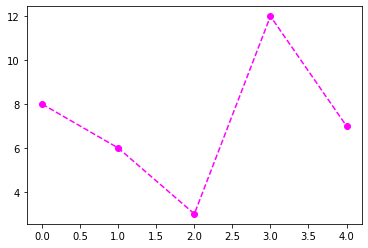

In [7]:
# Change color
# color = 'green' OR 'blue' OR 'red' etc.
plt.plot([8, 6, 3, 12, 7], marker = 'o', color = 'magenta', linestyle = 'dashed')
plt.show()

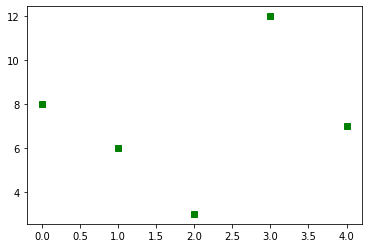

In [8]:
# Marker + color in the same argument
plt.plot([8, 6, 3, 12, 7], 'gs')
plt.show()

# Data import

In [3]:
# Read in data with pandas and store as object
lures = pd.read_excel('LURES.xlsx', sheet_name = 'LURES')
lures

,QUANTITY,SALES,DATE,PRODUCT,CATEGORY,PRICE,QUALITY,SALES_PERSON,SHOP,CITY,REGION
0,1,7.45,2016-01-01,Trout Performance,Lake,7.45,NORMAL,Henry Jacobs,Anglers United,Los Angeles,West
1,1,5.65,2016-01-01,Minnow Glitter,River,5.65,TOP,Nora Pollack,Happy Fisherman,Chicago,North
2,2,13.98,2016-01-01,Pike Magic,Lake,6.99,TOP,Tyler Lance,Fast Lures,New York,North
3,2,14.90,2016-01-01,Charles Lake Secret,Lake,7.45,NORMAL,Richard Smith,Lucky Lures,Seattle,West
4,3,22.35,2016-01-01,Charles Lake Secret,Lake,7.45,NORMAL,Henrik Griffin,Anglers United,Los Angeles,West
...,...,...,...,...,...,...,...,...,...,...,...
20910,16,74.40,2016-12-31,Fast Glider,River,4.65,NORMAL,Tiffany Smith,Fast Lures,New York,North
20911,16,98.40,2016-12-31,Steelhead Iron,River,6.15,TOP,Henry Jacobs,Anglers United,Los Angeles,West
20912,17,104.55,2016-12-31,Steelhead Iron,River,6.15,TOP,John Pittsburger,Happy Fisherman,Chicago,North
20913,17,178.33,2016-12-31,Redtail Trout,Ocean,10.49,NORMAL,Sean Simons,Fast Lures,New York,North


In [7]:
# Object class
type(lures)

pandas.core.frame.DataFrame

In [8]:
# Data classes in data frame
lures.dtypes

QUANTITY                 int64
SALES                  float64
DATE            datetime64[ns]
PRODUCT                 object
CATEGORY                object
PRICE                  float64
QUALITY                 object
SALES_PERSON            object
SHOP                    object
CITY                    object
REGION                  object
dtype: object

# Scatterplot, figure size and titles

In [6]:
# Scatterplot/ XY plot
# Matplotlib takes 1D objects
# Numpy array (np.array) or pandas Series (pd.Series) are recommended
QTY = lures['QUANTITY']
SALES = lures['SALES']

In [7]:
# One variable of a pd.DataFrame = pd.Series
type(QTY)

pandas.core.series.Series

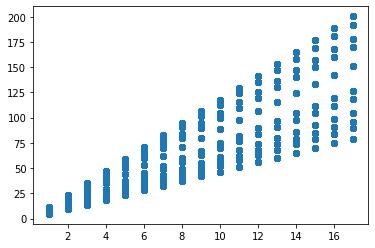

In [10]:
# Scatterplot with the generic plot funtion
plt.plot(QTY, SALES, 'o')

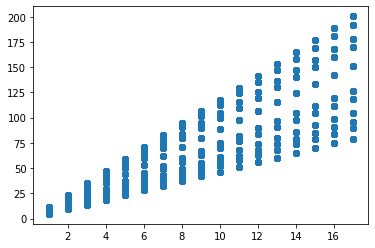

In [13]:
# Dedicated command
plt.scatter(QTY, SALES)

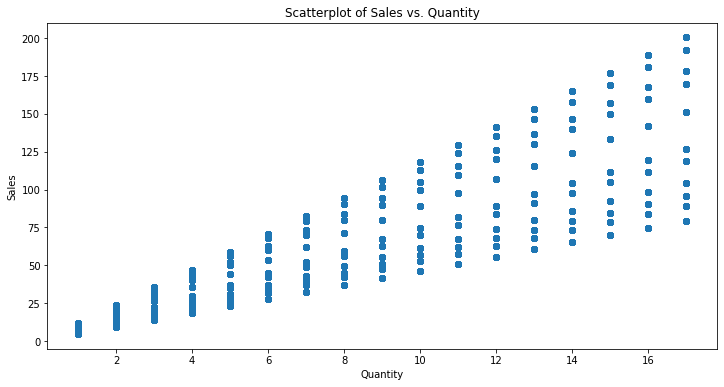

In [20]:
# Simple customization: Size, title and labels
plt.figure(figsize = (12, 6))
plt.scatter(QTY, SALES)
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title('Scatterplot of Sales vs. Quantity')
plt.show()

# Matplotlib integration in pandas

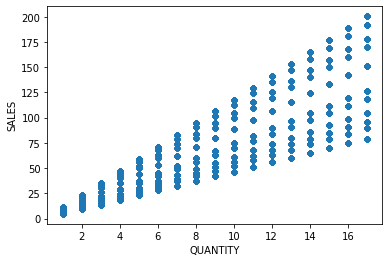

In [3]:
# Matplotlib is accessible in pandas via the .plot() method
lures.plot(kind = 'scatter', x = 'QUANTITY', y = 'SALES')

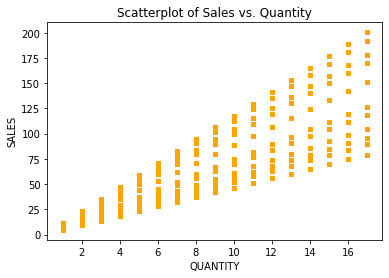

In [4]:
# Adjusmets done via arguments instead of layers
lures.plot(kind = 'scatter', x = 'QUANTITY', y = 'SALES', marker = 's',
           color = 'orange', title = 'Scatterplot of Sales vs. Quantity')

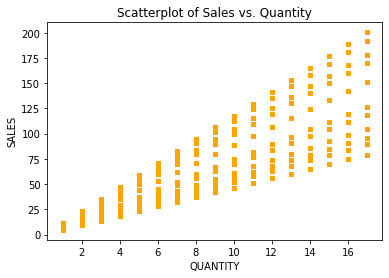

In [12]:
# Further plot elements (pyplot) can be added
lures.plot(kind = 'scatter', x = 'QUANTITY', y = 'SALES', marker = 's', color = 'orange')
plt.title('Scatterplot of Sales vs. Quantity')
plt.show()

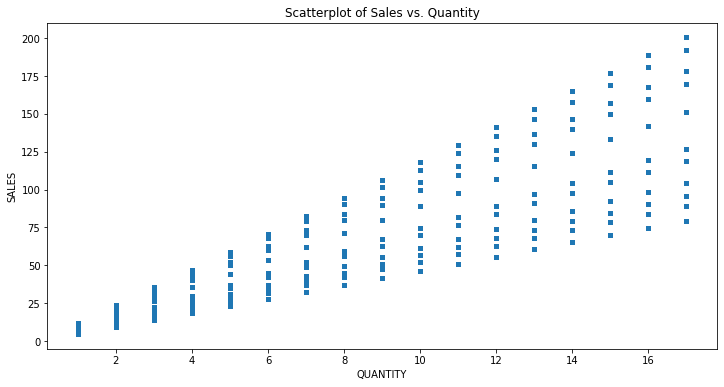

In [9]:
# Mix and match of pyplot and pylab commands is not recommended
# Inconsistent and potentially buggy code e.g. figure()
lures.plot(kind = 'scatter', x = 'QUANTITY', y = 'SALES', marker = 's', figsize = (12, 6))
plt.title('Scatterplot of Sales vs. Quantity')
plt.show()

# Module: Modifying a Matplotlib Visualization

# Plot types and the underlying calculations

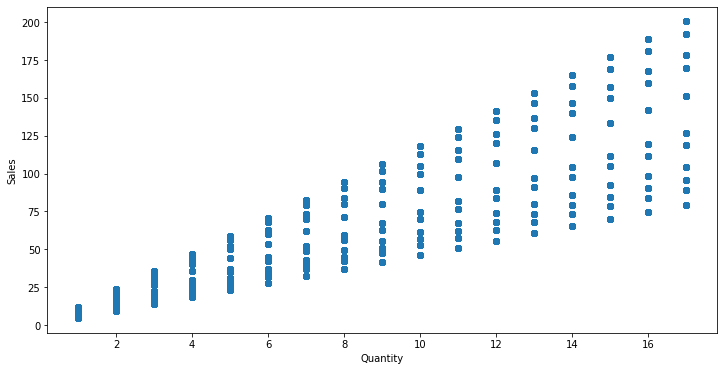

In [9]:
# Some plot functions don't require additional calculations
# Example #1: XY plot/ Scatterplot
# No calculation is required
plt.figure(figsize = (12, 6))
plt.scatter(lures['QUANTITY'], lures['SALES'])
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

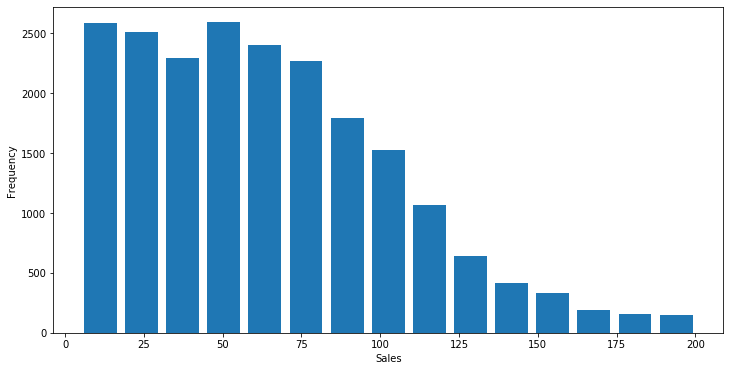

In [8]:
# Example #2: Histogram
# Bin size is calculated automatically OR defined number of bins
plt.figure(figsize = (12, 6))
plt.hist(lures['SALES'], bins = 15, rwidth = 0.8)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

(array([2588., 2510., 2292., 2593., 2405., 2267., 1790., 1526., 1065.,
         644.,  412.,  329.,  188.,  156.,  150.]),
 array([  4.65 ,  17.702,  30.754,  43.806,  56.858,  69.91 ,  82.962,
         96.014, 109.066, 122.118, 135.17 , 148.222, 161.274, 174.326,
        187.378, 200.43 ]),
 <a list of 15 Patch objects>)

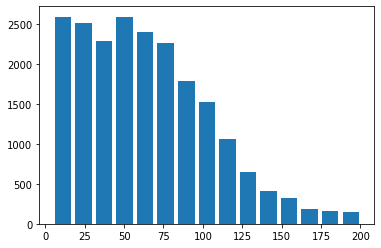

In [10]:
# Hint: List of objects
# 1st array: Frequencies
# 2nd array: Start caps
plt.hist(lures['SALES'], bins = 15, rwidth = 0.8)

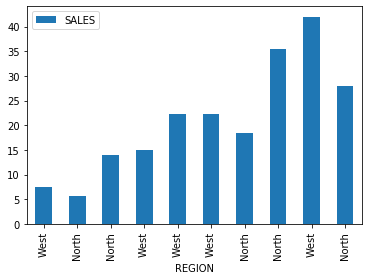

In [26]:
# Plot function doesn't group by categories
lures[0:10].plot(kind = 'bar', x = 'REGION', y = 'SALES')
plt.show()

In [4]:
# Grouping bars by categories
# Summary table:
lures_by_region = lures.groupby(['REGION'], as_index = False).sum()
lures_by_region

,REGION,QUANTITY,SALES,PRICE
0,North,74069,527398.13,58981.66
1,South,40979,300844.11,33430.75
2,West,73111,519195.89,57576.42


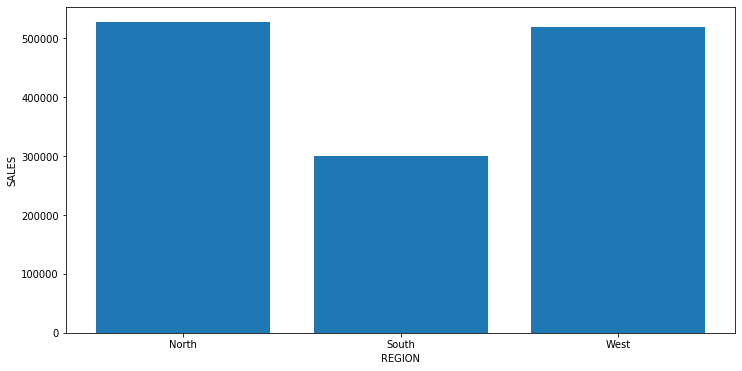

In [36]:
# Let's make the bar chart
plt.figure(figsize = (12, 6))
plt.bar(lures_by_region['REGION'], lures_by_region['SALES'])
plt.xlabel('REGION')
plt.ylabel('SALES')
plt.show()

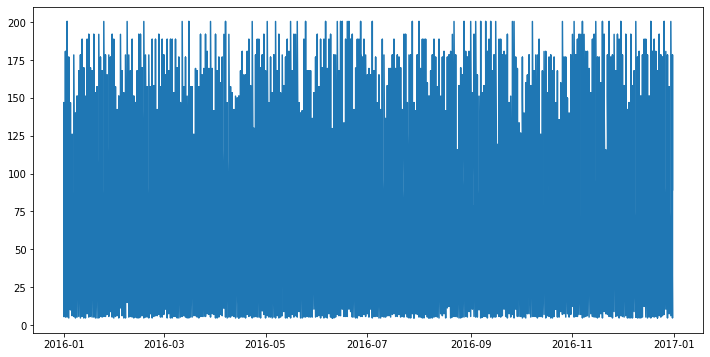

In [69]:
# Same technique for aggregating time series
# Visualizing the data as is results in a very dense plot
plt.figure(figsize = (12,6))
plt.plot(lures['DATE'], lures['SALES'])
plt.show()

In [45]:
# Getting the daily figures
lures_by_day = lures.groupby(['DATE'], as_index = False).sum()
lures_by_day

,DATE,QUANTITY,SALES,PRICE
0,2016-01-01,487,3556.27,372.91
1,2016-01-02,598,4289.52,440.46
2,2016-01-03,504,3645.32,376.79
3,2016-01-04,520,3696.88,412.53
4,2016-01-05,577,3936.49,373.57
...,...,...,...,...
361,2016-12-27,564,4237.34,485.19
362,2016-12-28,513,3661.23,415.62
363,2016-12-29,582,4095.40,485.43
364,2016-12-30,528,3874.42,452.52


In [50]:
# Date time format preserved
lures_by_day.dtypes

DATE        datetime64[ns]
QUANTITY           float64
SALES              float64
PRICE              float64
dtype: object

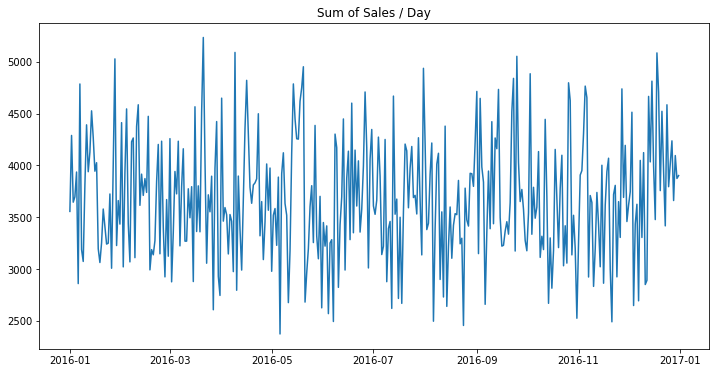

In [70]:
# Readable chart, equally spaced data points
plt.figure(figsize = (12,6))
plt.plot(lures_by_day['DATE'], lures_by_day['SALES'])
plt.title('Sum of Sales / Day')
plt.show()

# Additional series

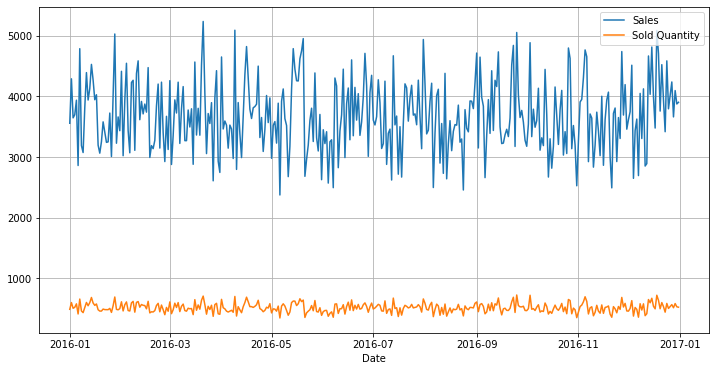

In [30]:
# Line graph with two data series
plt.figure(figsize = (12,6))
plt.plot(lures_by_day['DATE'], lures_by_day['SALES'])
plt.plot(lures_by_day['DATE'], lures_by_day['QUANTITY'])
plt.legend(['Sales', 'Sold Quantity'])
plt.xlabel('Date')
plt.grid()
plt.show()

In [8]:
# Group by 'city'
lures_by_city = lures.groupby('CITY', as_index = False).sum()
lures_by_city

,CITY,QUANTITY,SALES,PRICE
0,Austin,16697,119113.03,13123.48
1,Chicago,14493,102905.07,11671.09
2,Los Angeles,21443,147968.11,16871.99
3,Miami,24282,181731.08,20307.27
4,New York,59576,424493.06,47310.57
5,San Francisco,10500,80844.42,9012.28
6,Seattle,41168,290383.36,31692.15


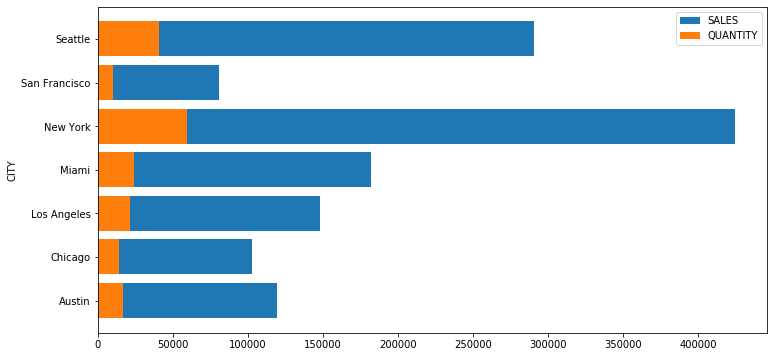

In [20]:
# Overlapping bars - Stacked bar chart
plt.figure(figsize = (12,6))
plt.barh(lures_by_city['CITY'], lures_by_city['SALES'])
plt.barh(lures_by_city['CITY'], lures_by_city['QUANTITY'])
plt.ylabel('CITY')
plt.legend(['SALES', 'QUANTITY'])
plt.show()

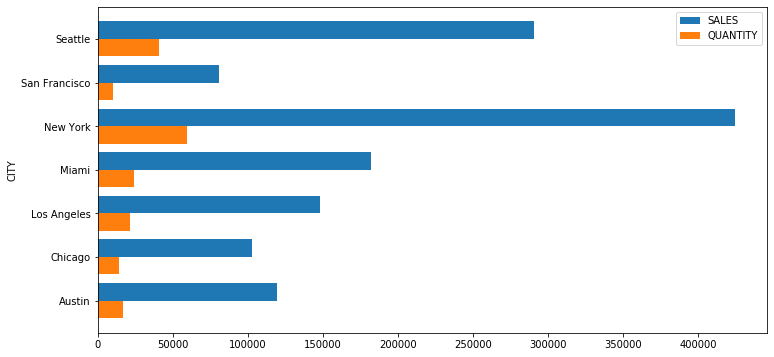

In [10]:
# Grouped bar chart
plt.figure(figsize = (12,6))
plt.barh(lures_by_city['CITY'], lures_by_city['SALES'], align = 'edge', height = 0.4)
plt.barh(lures_by_city['CITY'], lures_by_city['QUANTITY'], align = 'edge', height = -0.4)
plt.ylabel('CITY')
plt.legend(['SALES', 'QUANTITY'])
plt.show()

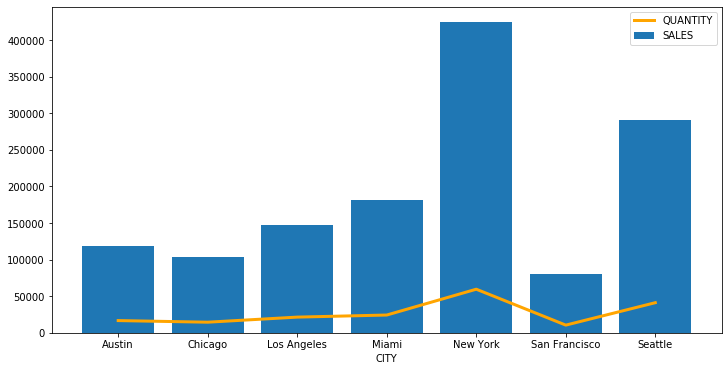

In [29]:
# Combination plot
plt.figure(figsize = (12,6))
plt.plot(lures_by_city['CITY'], lures_by_city['QUANTITY'], linewidth = 3, color = 'orange')
plt.bar(lures_by_city['CITY'], lures_by_city['SALES'])
plt.xlabel('CITY')
plt.legend(['QUANTITY', 'SALES'])
plt.show()

# Simple formatting techniques

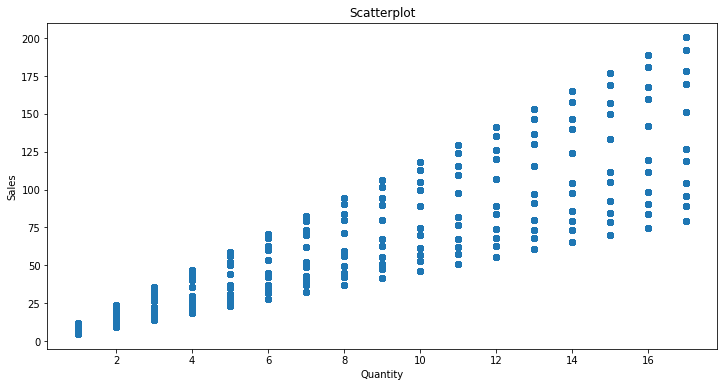

In [71]:
# Scatterplot with default formatting
plt.figure(figsize = (12, 6))
plt.scatter(lures['QUANTITY'], lures['SALES'])
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title('Scatterplot')
plt.show()

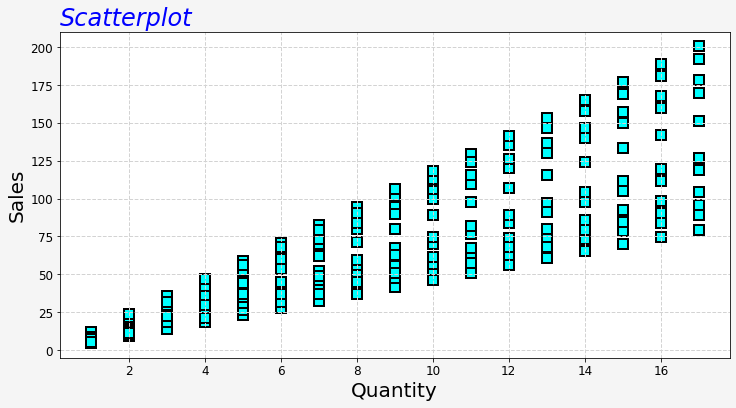

In [74]:
# Scatterplot with custom formatting
plt.figure(figsize = (12, 6), facecolor = 'whitesmoke')
plt.scatter(lures['QUANTITY'], lures['SALES'],
            marker = 's', edgecolors = 'black',
            facecolors = 'aqua', linewidths = 2, s = 100)
plt.xlabel('Quantity', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 'large')
plt.title('Scatterplot', fontsize = 24, loc = 'left',
          fontstyle = 'oblique', color = 'blue')
plt.grid(color = 'lightgray', linestyle = '--', linewidth = 1)
plt.show()

# Labels

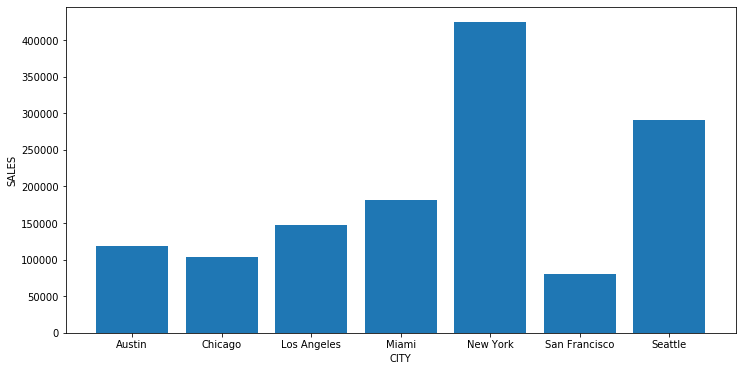

In [76]:
# Let's add labels representing the value of each bar
plt.figure(figsize = (12, 6))
plt.bar(lures_by_city['CITY'], lures_by_city['SALES'])
plt.xlabel('CITY')
plt.ylabel('SALES')
plt.show()

In [77]:
# Creating helper objects
sales = np.array(lures_by_city['SALES'])
city = np.array(lures_by_city['CITY'])

In [80]:
sales = np.round(sales_city, 0)
sales = sales.astype(int)
sales

array([119113, 102905, 147968, 181731, 424493,  80844, 290383])

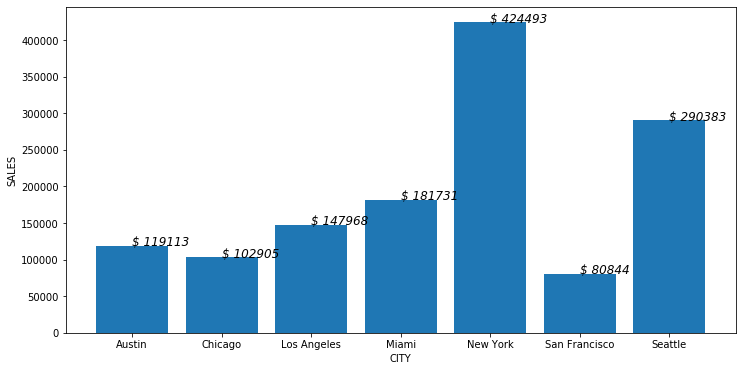

In [83]:
plt.figure(figsize = (12, 6))
plt.bar(lures_by_city['CITY'], lures_by_city['SALES'])
plt.xlabel('CITY')
plt.ylabel('SALES')

for i in range(len(sales)):
    plt.annotate(s = ('$ '+str(sales[i])), xy=(city[i], sales[i]),
                 fontsize = 'large', fontstyle = 'oblique')

plt.show()

# Subplot layouts

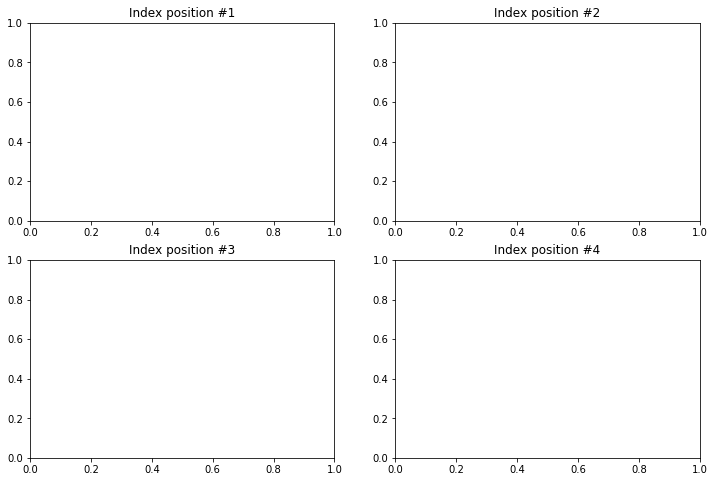

In [89]:
# Setup: subplot(nrows, ncolumns, index)
# 2x2 grid
plt.figure(figsize = (12, 8))
plt.subplot(221)
plt.title('Index position #1')
plt.subplot(222)
plt.title('Index position #2')
plt.subplot(223)
plt.title('Index position #3')
plt.subplot(224)
plt.title('Index position #4')
plt.show()

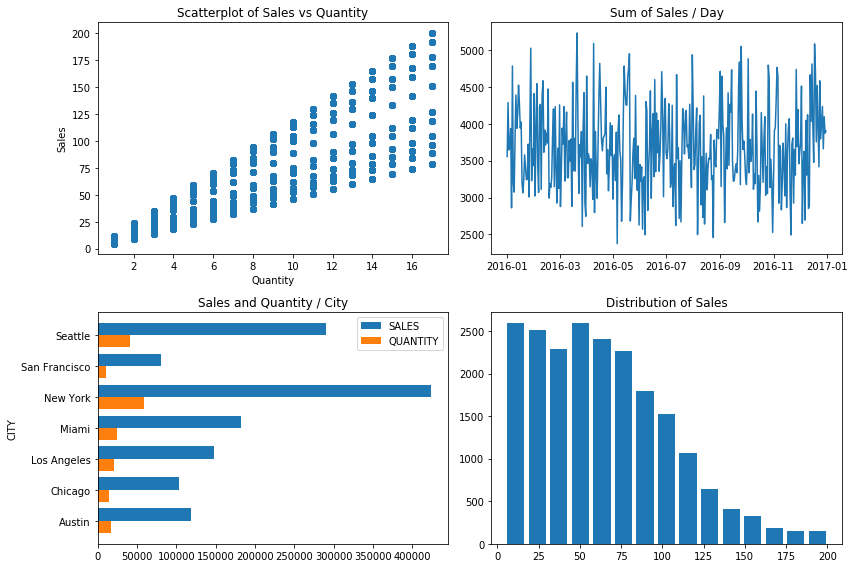

In [50]:
# 2x2 grid filled with data visualizations
plt.figure(figsize = (12, 8))

plt.subplot(221)
plt.scatter(lures['QUANTITY'], lures['SALES'])
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title('Scatterplot of Sales vs Quantity')

plt.subplot(222)
plt.plot(lures_by_day['DATE'], lures_by_day['SALES'])
plt.title('Sum of Sales / Day')

plt.subplot(223)
plt.barh(lures_by_city['CITY'], lures_by_city['SALES'], align = 'edge', height = 0.4)
plt.barh(lures_by_city['CITY'], lures_by_city['QUANTITY'], align = 'edge', height = -0.4)
plt.ylabel('CITY')
plt.legend(['SALES', 'QUANTITY'])
plt.title('Sales and Quantity / City')

plt.subplot(224)
plt.hist(lures['SALES'], bins = 15, rwidth = 0.8)
plt.title('Distribution of Sales')

plt.tight_layout()
plt.show()

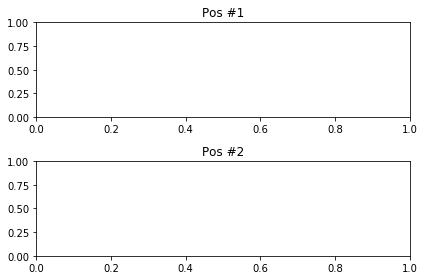

In [56]:
# Layout: 2x1
plt.figure()

plt.subplot(211)
plt.title('Pos #1')

plt.subplot(212)
plt.title('Pos #2')

plt.tight_layout()
plt.show()

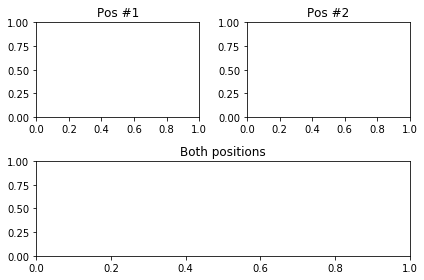

In [97]:
# Get creative with layouts
plt.figure()
plt.subplot(221)
plt.title('Pos #1')
plt.subplot(222)
plt.title('Pos #2')
plt.subplot(212)
plt.title('Both positions')
plt.tight_layout()
plt.show()

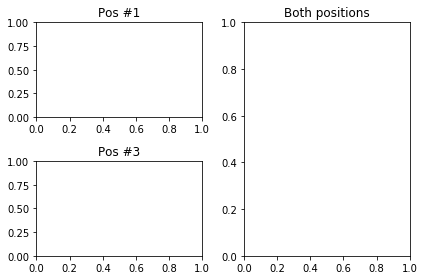

In [99]:
plt.figure()
plt.subplot(221)
plt.title('Pos #1')
plt.subplot(223)
plt.title('Pos #3')
plt.subplot(122)
plt.title('Both positions')
plt.tight_layout()
plt.show()